# DataStream Class - Jupyter Notebook Guide

This notebook demonstrates the usage of the `DataStream` class, which provides methods for analyzing time-series data.
The `DataStream` class provides various utilities for handling time series data, performing statistical analysis, and estimating different metrics like mean, uncertainty, confidence intervals, and effective sample size (ESS). Below is a breakdown of the functionality for each method of the DataStream class, including how to call them and their expected outputs applied to a GX data.



### Features:
- **Trimming**: Identifies steady-state regions in data.
- **Statistical Analysis**: Computes mean, standard deviation, confidence intervals, and cumulative statistics.
- **Stationarity Testing**: Uses the Augmented Dickey-Fuller test.
- **Effective Sample Size (ESS)**: Estimates the independent sample size.
- **Optimal Window Size**: Determines the best window for data smoothing.


## 1. Import Required Libraries

In [60]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
import os

# Path to the "src/quends" directory
src_path = os.path.abspath(os.path.join(os.getcwd(), '../../src/quends'))
if src_path not in sys.path:
    sys.path.append(src_path)

# Now we can import DataStream
import quends as qnds

## 2.  Load Data into DataStream Object
A `DataStream`object can be initialized with a **Pandas DataFrame, netcdf, numpy arrays, csv files, json**.

### GX Data Analysis

In [61]:
# Specify the csv file paths
tprim_2_0 = "gx/tprim_2_0.out.csv" 
tprim_2_1 = "gx/tprim_2_1.out.csv" 
tprim_2_2 = "gx/tprim_2_2.out.csv" 
tprim_2_3 = "gx/tprim_2_3.out.csv" 
tprim_2_4 = "gx/tprim_2_4.out.csv" 
tprim_2_5 = "gx/tprim_2_5.out.csv" 
tprim_2_6 = "gx/tprim_2_6.out.csv" 

In [62]:
# Load Data
data_stream_tprim_2_0 = qnds.from_csv(tprim_2_0)
data_stream_tprim_2_3 = qnds.from_csv(tprim_2_3)
data_stream_tprim_2_4 = qnds.from_csv(tprim_2_4)
data_stream_tprim_2_5 = qnds.from_csv(tprim_2_5)
data_stream_tprim_2_6 = qnds.from_csv(tprim_2_6)

## 3. Basic Data Exploration

### 3.1 Viewing first Few Rows

In [63]:
data_stream_tprim_2_0.head()

,time,Phi2_t,Phi2_kxt,Phi2_kyt,Phi2_kxkyt,Phi2_zt,Apar2_t,Apar2_kxt,Apar2_kyt,Apar2_kxkyt,...,ParticleFlux_st,ParticleFlux_kxst,ParticleFlux_kyst,ParticleFlux_kxkyst,ParticleFlux_zst,TurbulentHeating_st,TurbulentHeating_kxst,TurbulentHeating_kyst,TurbulentHeating_kxkyst,TurbulentHeating_zst
0,0.012685,0.000103,1.251270e-07,1.663059e-15,1.320526e-17,0.000002,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1.304616e-11,-1.316719e-13,0.000000e+00,0.0,-1.393458e-12
1,1.281211,0.000083,1.117468e-07,6.184704e-06,8.777362e-18,0.000002,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1.944129e-12,-6.601425e-14,-5.093813e-13,0.0,6.565006e-13
2,2.549738,0.000067,1.158684e-07,6.426714e-06,3.317765e-17,0.000002,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1.361976e-12,-7.059600e-14,-7.778617e-13,0.0,-9.838717e-14
3,3.818264,0.000055,1.155933e-07,6.020694e-06,5.841160e-18,0.000002,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.161401e-12,-3.758944e-14,1.206332e-14,0.0,-7.145268e-13
4,5.086790,0.000048,1.123603e-07,5.107271e-06,1.061577e-17,0.000002,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-5.575014e-12,-2.101618e-15,-1.164756e-12,0.0,-4.511161e-13


### 3.2 Liating Available Variables 

In [64]:
# Get available variables
data_stream_tprim_2_0.variables()

Index(['time', 'Phi2_t', 'Phi2_kxt', 'Phi2_kyt', 'Phi2_kxkyt', 'Phi2_zt',
       'Apar2_t', 'Apar2_kxt', 'Apar2_kyt', 'Apar2_kxkyt', 'Apar2_zt',
       'Phi2_zonal_t', 'Phi2_zonal_kxt', 'Phi2_zonal_zt', 'Wg_st', 'Wg_kxst',
       'Wg_kyst', 'Wg_kxkyst', 'Wg_zst', 'Wg_lmst', 'Wphi_st', 'Wphi_kxst',
       'Wphi_kyst', 'Wphi_kxkyst', 'Wphi_zst', 'Wapar_st', 'Wapar_kxst',
       'Wapar_kyst', 'Wapar_kxkyst', 'Wapar_zst', 'HeatFlux_st',
       'HeatFlux_kxst', 'HeatFlux_kyst', 'HeatFlux_kxkyst', 'HeatFlux_zst',
       'HeatFluxES_st', 'HeatFluxES_kxst', 'HeatFluxES_kyst',
       'HeatFluxES_kxkyst', 'HeatFluxES_zst', 'HeatFluxApar_st',
       'HeatFluxApar_kxst', 'HeatFluxApar_kyst', 'HeatFluxApar_kxkyst',
       'HeatFluxApar_zst', 'HeatFluxBpar_st', 'HeatFluxBpar_kxst',
       'HeatFluxBpar_kyst', 'HeatFluxBpar_kxkyst', 'HeatFluxBpar_zst',
       'ParticleFlux_st', 'ParticleFlux_kxst', 'ParticleFlux_kyst',
       'ParticleFlux_kxkyst', 'ParticleFlux_zst', 'TurbulentHeating_st',
       'T

### 3.3 Check length of DataStream

In [65]:
# Get the number of rows
len(data_stream_tprim_2_0)

896

## 4. Data Processing

### Trace plot

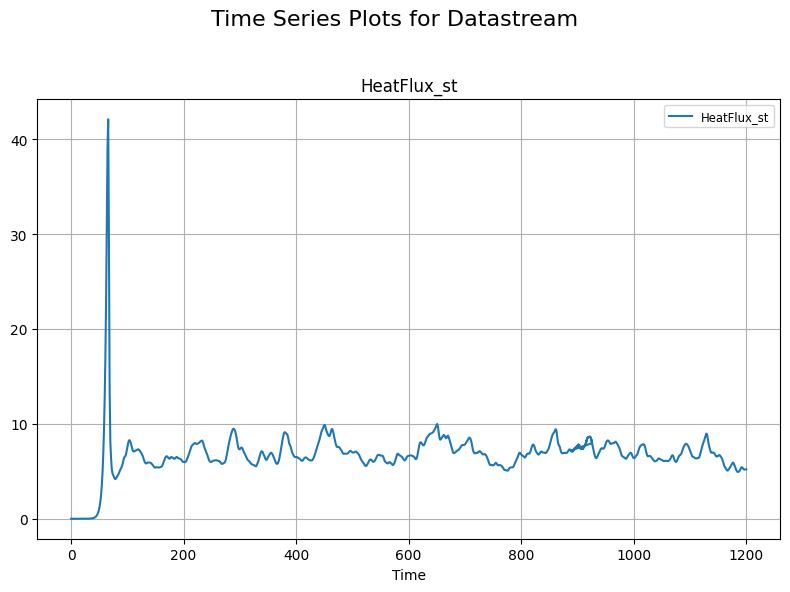

In [66]:
plotter=qnds.Plotter()
plotter.trace_plot(data_stream_tprim_2_4,["HeatFlux_st"])

### 4.1 Stationarity Check

The is_stationary() method checks whether the specified columns in the data stream are stationary by performing the Augmented Dickey-Fuller (ADF) test.

In [67]:
# Check if multiple columns are stationary
data_stream_tprim_2_0.is_stationary(["HeatFlux_st", "Wg_st", 'Phi2_t'])

{'HeatFlux_st': True, 'Wg_st': True, 'Phi2_t': False}

### 4.2 Trimming data based to obtain steady-state portion

The trim() method is used to trim the data from the steady-state point based on a chosen method. 

Expected Output:
- This will return a new DataStream object containing only the data from the steady-state point onward.

**Trim based on the standard deviation approach**

In [68]:
# Trim the data based on standard deviation method
trimmed_df = data_stream_tprim_2_4.trim(column_name='HeatFlux_st', window_size = 50, method='std')
# View trimmed data
trimmed_df.head()


,time,HeatFlux_st
0,183.948976,6.316876
1,185.217502,6.379299
2,186.486029,6.472689
3,187.754555,6.511630
4,189.023081,6.464383


In [69]:
new_trimmed_df = trimmed_df.trim(column_name='HeatFlux_st', window_size = 50, method='std')
new_trimmed_df.head()

,time,HeatFlux_st
0,183.948976,6.316876
1,185.217502,6.379299
2,186.486029,6.472689
3,187.754555,6.511630
4,189.023081,6.464383


**We can also trim based on the threshold method**

In [70]:
# Trim the data based on threshold method
trimmed_df_ts = data_stream_tprim_2_4.trim(column_name='HeatFlux_st', window_size = 50, method='threshold', threshold = 0.001 )
# View trimmed data
trimmed_df_ts.head()

,time,HeatFlux_st
0,192.828659,6.327942
1,194.097185,6.306301
2,195.365712,6.259398
3,196.634238,6.154884
4,197.902764,6.040464


#### Plot of the trace together with the start of the steady state

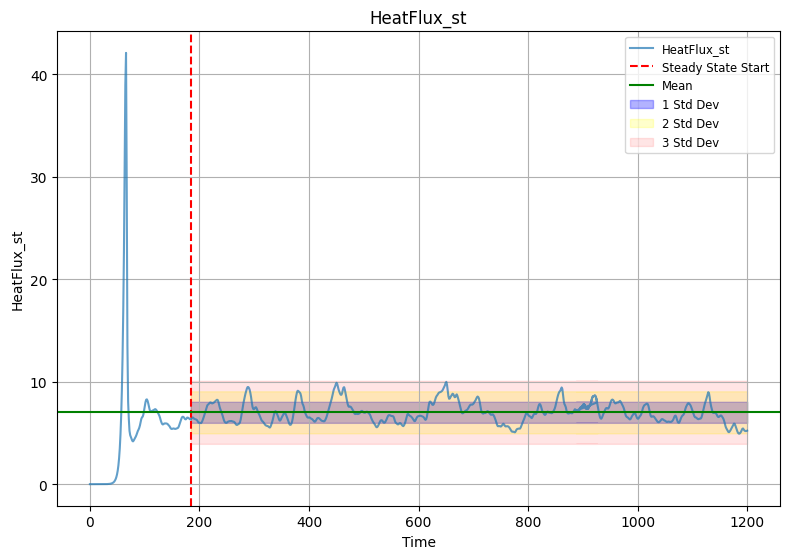

In [71]:
plotter.steady_state_automatic_plot(data_stream_tprim_2_4,["HeatFlux_st"])

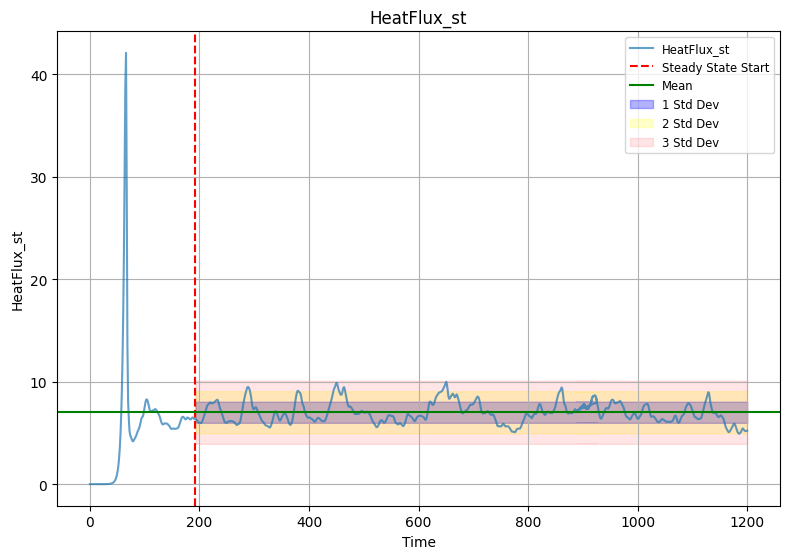

In [72]:
plotter.steady_state_plot(data_stream_tprim_2_4,["HeatFlux_st"], 192)

### 4.3 Autocorrelation Plot

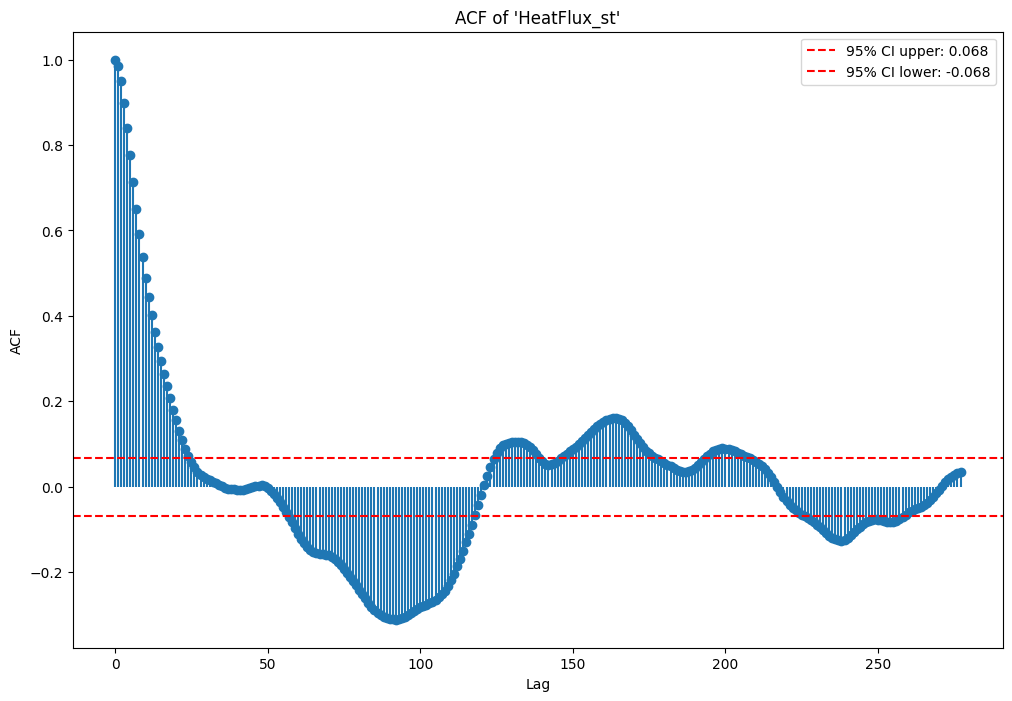

In [73]:
plotter.plot_acf(trimmed_df)

### 4.4 Effective Sample Size
The ESS can be computed using the following formula:


$$ESS = \frac{n}{1 + 2 \sum_{k=1}^{K} \rho(k)}$$
Where:
- $n$ is the total sample size.
- $\rho(k)$ is the autocorrelation at lag $k$.
- $K$ is a truncation point where $\rho(k)$ is considered small enough to be considered ignored (insignificant)

**effective_sample_size:** In this function, it directly identifies the lags where the absolute ACF exceeds the critical value (95% CI). These are treated as the "significant" lags and their absolute ACF values are summed up for ESS calculation.

In [74]:
ess_df = trimmed_df.effective_sample_size()
ess_df

{'HeatFlux_st': 14}

**effective_sample_size_below:** This function identifies the first lag at which the absolute ACF falls below a critical value (confidence interval). The lags before this drop are considered "significant," and their absolute ACF values are summed up for ESS calculation.

In [75]:
ess_df = trimmed_df.effective_sample_size_below()
ess_df

{'HeatFlux_st': 37}

## 5. UQ Analysis

### 5.1 Mean Estimation

The mean() method calculates the mean of the short-term averages for a specified column, using either the sliding window or non-overlapping method.

#### Using non-overlapping method 

In [76]:
mean_df = trimmed_df.mean()
mean_df

{'HeatFlux_st': {'mean': 7.0652155218523}}

#### Using sliding Window method 

In [77]:
mean_df_s = trimmed_df.mean(method="sliding")
mean_df_s


{'HeatFlux_st': {'mean': 7.071526112597048}}

### 5.2 Estimate Mean Uncertainty

The mean_uncertainty() method computes the uncertainty (standard error) of the mean for short-term averages.

In [78]:
uq_df = trimmed_df.mean_uncertainty()
uq_df


{'HeatFlux_st': {'mean uncertainty': 0.0766442295177159}}

In [79]:
uq_df = trimmed_df.mean_uncertainty(method="sliding")
uq_df

{'HeatFlux_st': {'mean uncertainty': 0.076331199723998}}

### 5.3 Estimate confidence interval

The confidence_interval() method computes the confidence interval for the mean of short-term averages.

In [80]:
ci_df = trimmed_df.confidence_interval()
ci_df

{'HeatFlux_st': {'confidence interval': (6.914992831997577,
   7.215438211707023)}}

### 5.4 Estimating Full Statistics

The compute_statistics() method calculates the mean, standard deviation, confidence interval, and plus-minus one (±1) standard deviation for short-term averages.

In [81]:
stats_non_overlap = trimmed_df.compute_statistics()
stats_non_overlap

{'HeatFlux_st': {'mean': 7.0652155218523,
  'mean_uncertainty': 0.0766442295177159,
  'confidence_interval': (6.914992831997577, 7.215438211707023),
  'pm_std': (6.988571292334584, 7.141859751370016)}}

In [82]:
stats = trimmed_df.compute_statistics(method="sliding")
stats

{'HeatFlux_st': {'mean': 7.071526112597048,
  'mean_uncertainty': 0.076331199723998,
  'confidence_interval': (6.921916961138011, 7.221135264056084),
  'pm_std': (6.99519491287305, 7.147857312321046)}}

### 5.5 Optimal Window Size Selection

The optimal_window_size() method determines the optimal window size that minimizes the uncertainty (standard error) of the mean.

In [83]:
optimal_df = trimmed_df.optimal_window_size()
optimal_df

{'HeatFlux_st': {'optimal_window_size': 366,
  'min_std': 0.03380381685599005,
  'mean': 7.088564639435337,
  'ci': (7.022309158397597, 7.154820120473078)}}

### 5.6 Additional Data to achieve some level of uncertainty reduction

The additional_data() method estimates how many additional samples (in time steps) are needed to reduce the uncertainty in the mean by a specified factor using a power-law SEM model.

In [84]:
addition_info = trimmed_df.additional_data(reduction_factor=0.1, window_size = 20)
addition_info

{'HeatFlux_st': {'A_est': 0.35233186664044935,
  'p_est': 0.14430836474942468,
  'n_current': 814,
  'current_sem': 0.1339443738659302,
  'target_sem': 0.12054993647933718,
  'n_target': 1689.2959897225485,
  'additional_samples': 876}}

In [85]:
addition_info = trimmed_df.additional_data(reduction_factor=0.2, window_size = 20)
addition_info

{'HeatFlux_st': {'A_est': 0.35233186664044935,
  'p_est': 0.14430836474942468,
  'n_current': 814,
  'current_sem': 0.1339443738659302,
  'target_sem': 0.10715549909274416,
  'n_target': 3820.960415311699,
  'additional_samples': 3007}}

## Another Example

### tprim_2_5

In [86]:
# Trim the data based on threshold method
trimmed_ds = data_stream_tprim_2_5.trim(column_name='HeatFlux_st', window_size = 50, method='threshold', threshold = 0.001 )
# View trimmed data
trimmed_ds.head()

,time,HeatFlux_st
0,293.078480,7.477662
1,295.085729,7.510831
2,297.092978,7.533398
3,299.100228,7.588586
4,301.107477,7.634036


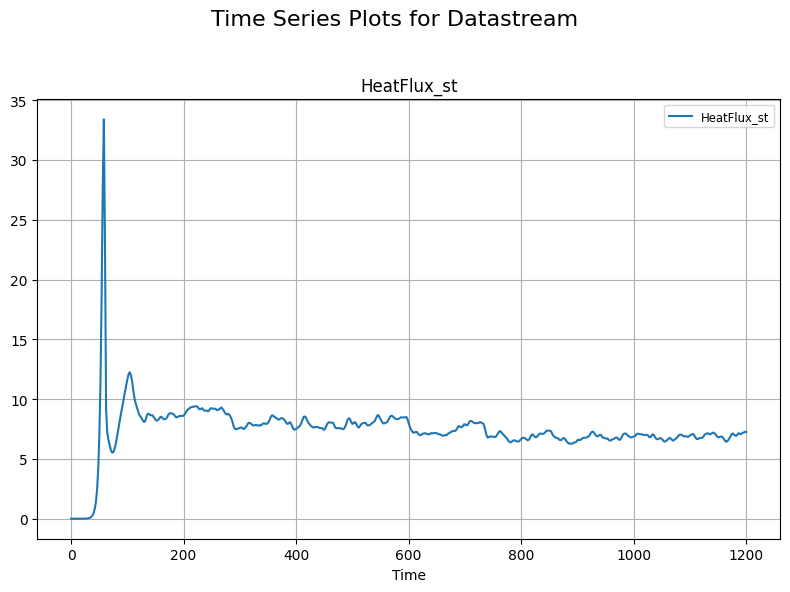

In [87]:
plotter.trace_plot(data_stream_tprim_2_5,["HeatFlux_st"])

## UQ Analysis

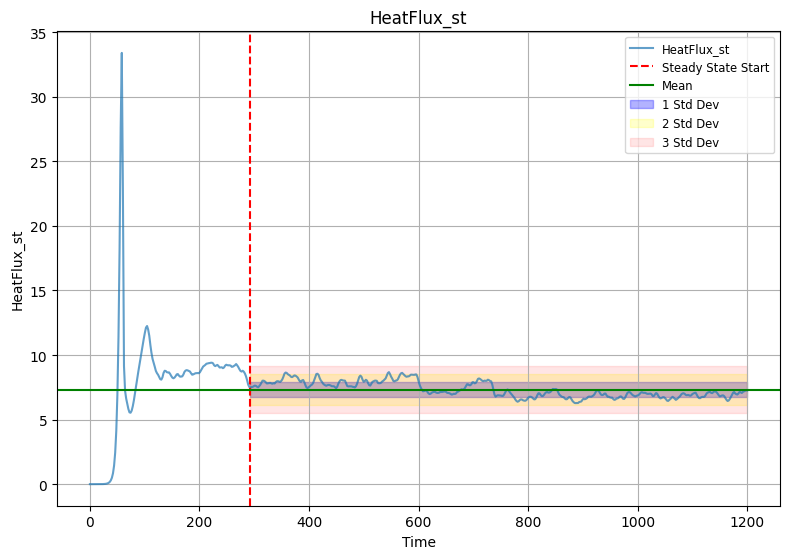

In [88]:
plotter.steady_state_automatic_plot(data_stream_tprim_2_5,["HeatFlux_st"], window_size = 50, method='threshold', threshold = 0.001)

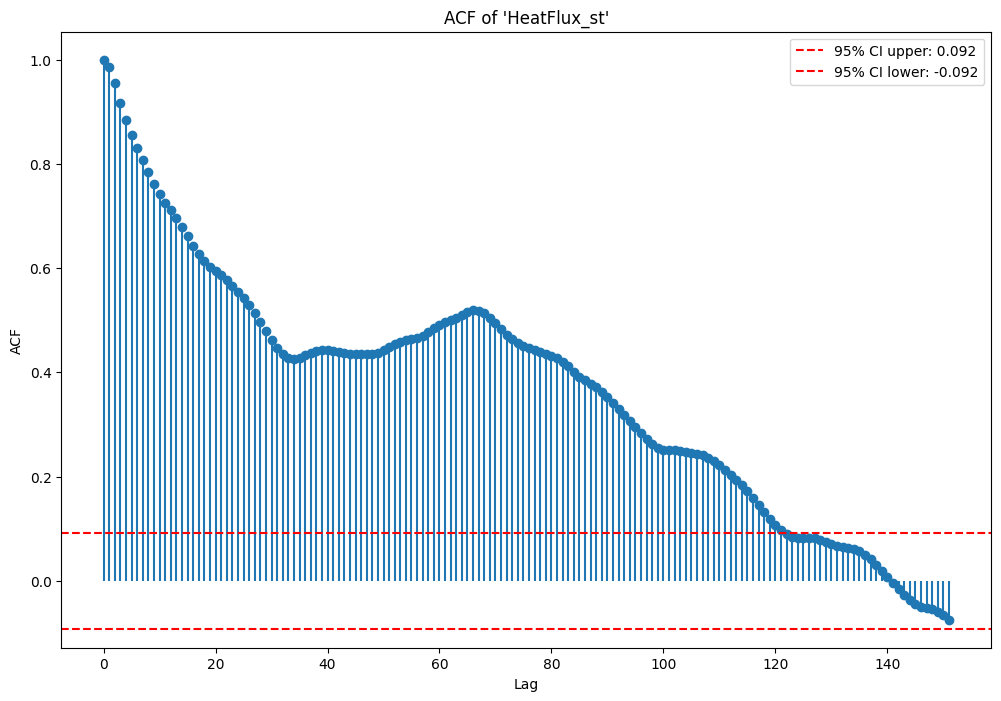

In [89]:
plotter.plot_acf(trimmed_ds)

In [90]:
ess_dfs = trimmed_ds.effective_sample_size()
ess_dfs

{'HeatFlux_st': 5}

In [91]:
stats_t5 = trimmed_ds.compute_statistics(method="sliding")
stats_t5

{'HeatFlux_st': {'mean': 7.299510077652625,
  'mean_uncertainty': 0.1146882862741718,
  'confidence_interval': (7.074721036555249, 7.524299118750002),
  'pm_std': (7.184821791378454, 7.414198363926797)}}

In [92]:
stats_t5m = trimmed_ds.compute_statistics()
stats_t5m

{'HeatFlux_st': {'mean': 7.31329102620915,
  'mean_uncertainty': 0.119459763041151,
  'confidence_interval': (7.079149890648494, 7.547432161769806),
  'pm_std': (7.193831263167999, 7.432750789250301)}}

In [93]:
optimal_ds = trimmed_ds.optimal_window_size()
optimal_ds

{'HeatFlux_st': {'optimal_window_size': 6,
  'min_std': 0.02794392708282052,
  'mean': 7.322665713095239,
  'ci': (7.26789561601291, 7.377435810177567)}}

In [94]:
addition_info = trimmed_ds.additional_data(reduction_factor=0.2, window_size = 20)
addition_info

{'HeatFlux_st': {'A_est': 0.00847050047348974,
  'p_est': 0.7122171042674419,
  'n_current': 434,
  'current_sem': 0.00011205823387865344,
  'target_sem': 8.964658710292276e-05,
  'n_target': 593.6873676904281,
  'additional_samples': 160}}